## Loss Function

In [46]:
#Mean square error
import numpy as np
import matplotlib.pyplot as plt
import random

y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

def mse(y_true, y_predicted):
    return np.mean(np.square(y_true - y_predicted))

def hinge_loss(y_true, y_predicted):
    return np.mean(np.maximum(0, 1 - y_true * y_predicted))

def bce(y_true, y_predicted):
    return -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
def abs_loss(y_true, y_predicted):
    return np.mean(np.abs(y_true - y_predicted))




## Discussion

$$
L_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



In [47]:
mse(y_true, y_predicted)

np.float64(0.366)

**Mse** Measures the squared difference between predicted and actual values.It is suited for regression tasks where the output is continuous. It penelises large errors(data with outliers)

$$
L_{\text{hinge}} = \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i \cdot \hat{y}_i)
$$


In [48]:
hinge_loss(y_true, y_predicted)

np.float64(0.7)

**HingeLoss** Encourages correct classification with a margin.It  is suited for binary classification tasks, especially with margin-based classifiers like SVMs. It only penalises predictions that are within or outside the margin boundary.

$$
L_{\text{MAE}} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

In [49]:
abs_loss(y_true, y_predicted)

np.float64(0.5)

Measures the absolute difference between predicted and true values.Used for Regression tasks It is less sensitive to large errors

$$
L_{\text{BCE}} = -\frac{1}{n} \sum_{i=1}^{n}
\left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

In [54]:
np.random.seed(42)
class1 = np.random.randn(50, 2) + np.array([-2, -2])
class2 = np.random.randn(50, 2) + np.array([2, 2])
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(len(class1)), np.ones(len(class2))))  # labels 0 and 1

# Create mock predictions (simulate a model output)
#  map them to probabilities using a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a simple linear relationship
scores = X[:, 0] * 0.5 + X[:, 1] * 0.5
y_pred = sigmoid(scores)
bce(y, y_pred)

np.float64(0.1421276317184452)

## Decision Tree

In [45]:
## Data

Data = {
    'Home_Match': ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T'],
    'Positive_balance': ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F'],
    'Bad_weather_conditions': ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T'],
    'Win_previous_Match': ['F', 'T', 'F', 'T', 'T', 'F', 'T', 'F'],
    'Match_won': ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
}



In [44]:
class TreeNode:
    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label      # If leaf node, what's the prediction ('T' or 'F')
        self.left = None        # Left child (when feature is 'T')
        self.right = None       # Right child (when feature is 'F')


class DecisionTree:
    def __init__(self):
        self.root = None

    def gini(self, labels):
        if len(labels) == 0:
            return 0
        Tcount = labels.count('T')
        Fcount = labels.count('F')
        total = len(labels)
        return (Tcount/total) * (1 - Tcount/total) + (Fcount/total) * (1 - Fcount/total)

    def gain(self, data):
        class_labels = data['Match_won']
        parentGini = self.gini(class_labels)

        best_gain = 0
        best_feature = None

        for feature_name in data:
            if feature_name == 'Match_won':
                continue

            feature_values = data[feature_name]

            # Get indexes where feature is 'T' and 'F'
            idx_T = [i for i, value in enumerate(feature_values) if value == 'T']
            idx_F = [i for i, value in enumerate(feature_values) if value == 'F']

            if len(idx_T) == 0 or len(idx_F) == 0:
                continue

            # Get labels for each split
            labels_T = [class_labels[i] for i in idx_T]
            labels_F = [class_labels[i] for i in idx_F]

            # Calculate weighted Gini for this split
            total = len(class_labels)
            weighted_gini = (len(idx_T)/total) * self.gini(labels_T) + (len(idx_F)/total) * self.gini(labels_F)


            current_gain = parentGini - weighted_gini

            if current_gain > best_gain:
                best_gain = current_gain
                best_feature = feature_name

        return best_feature, best_gain


    def split_data(self, data, feature, value):
        feature_values = data[feature]
        indices = [i for i, val in enumerate(feature_values) if val == value]

        # Create new subset of data
        new_data = {}
        for key in data:
            new_data[key] = [data[key][i] for i in indices]

        return new_data

    def build_tree(self, data):
        class_labels = data['Match_won']

        # base case
        if len(set(class_labels)) == 1:
            return TreeNode(label=class_labels[0])


        if len(data) == 1 or all(key == 'Match_won' for key in data):
            Tcount = class_labels.count('T')
            Fcount = class_labels.count('F')
            if Tcount >= Fcount:
              return TreeNode(label='T')
            else:
              return TreeNode(label='F')


        # No data left
        if len(class_labels) == 0:
            return TreeNode(label='F')  # Default prediction

        # Find best feature to split on
        best_feature, best_gain = self.gain(data)

        # If no gain, make it a leaf node
        if best_feature is None or best_gain == 0:
            Tcount = class_labels.count('T')
            Fcount = class_labels.count('F')
            if Tcount >= Fcount:
              return TreeNode(label='T')
            else:
              return TreeNode(label='F')

        # Create node with this feature
        node = TreeNode(feature=best_feature)

        # Split data and build left and right subtrees
        left_data = self.split_data(data, best_feature, 'T')
        right_data = self.split_data(data, best_feature, 'F')

        # Remove the used feature from further consideration
        left_data_reduced = {k: v for k, v in left_data.items() if k != best_feature}
        right_data_reduced = {k: v for k, v in right_data.items() if k != best_feature}

        # Recursively build left and right subtrees
        node.left = self.build_tree(left_data_reduced)
        node.right = self.build_tree(right_data_reduced)

        return node

    def fit(self, data):
        """Train the decision tree"""
        self.root = self.build_tree(data)

    def predict_single(self, node, sample):
        """Predict for a single sample"""
        # If it's a leaf node, return the label
        if node.label is not None:
            return node.label

        # Otherwise, traverse based on feature value
        if sample[node.feature] == 'T':
            return self.predict_single(node.left, sample)
        else:
            return self.predict_single(node.right, sample)

    def predict(self, samples):
        """Predict for multiple samples"""
        predictions = []
        for sample in samples:
            predictions.append(self.predict_single(self.root, sample))
        return predictions

    def print_tree(self, node=None, depth=0):
        """Visualize the tree structure"""
        if node is None:
            node = self.root

        if node.label is not None:
            print("  " * depth + f"Predict: {node.label}")
        else:
            print("  " * depth + f"Split on {node.feature}")
            print("  " * depth + "  T:")
            self.print_tree(node.left, depth + 2)
            print("  " * depth + "  F:")
            self.print_tree(node.right, depth + 2)


data = {
    'Home_Match': ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T'],
    'Positive_balance': ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F'],
    'Bad_weather_conditions': ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T'],
    'Win_previous_Match': ['F', 'T', 'F', 'T', 'T', 'F', 'T', 'F'],
    'Match_won': ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
}

# Build the tree
dt = DecisionTree()
dt.fit(data)

# Print the tree structure
print("Decision Tree Structure:")
dt.print_tree()

Decision Tree Structure:
Split on Positive_balance
  T:
    Split on Home_Match
      T:
        Predict: T
      F:
        Predict: F
  F:
    Split on Home_Match
      T:
        Predict: F
      F:
        Split on Win_previous_Match
          T:
            Predict: T
          F:
            Predict: F


In [5]:
 #Make predictions
test_sample = {
    'Home_Match': 'T',
    'Positive_balance': 'T',
    'Bad_weather_conditions': 'F',
    'Win_previous_Match': 'F'
}

prediction = dt.predict_single(dt.root, test_sample)
print(f"\nPrediction for test sample: {prediction}")


Prediction for test sample: T


## Random Forest

In [6]:
samples=input("Enter number of samples")

Enter number of samples2


In [7]:
class RandomForest:
    def __init__(self, n_trees=3):
        self.n_trees = n_trees
        self.trees = []

    def create_feature_subset(self, data):
        """Randomly select a subset of features (columns)"""
        features = [f for f in data if f != 'Match_won']
        num_features = random.randint(1, len(features))
        chosen_features = random.sample(features, num_features)

        # Build sub-dataset with selected features + target
        subset = {f: data[f] for f in chosen_features}
        subset['Match_won'] = data['Match_won']
        return subset

    def fit(self, data):
        """Train multiple decision trees on random feature subsets"""
        self.trees = []

        for i in range(self.n_trees):
            subset = self.create_feature_subset(data)
            print(f"\n Subset for Tree {i+1}:")

            for key, values in subset.items():
              print(f"{key}: {values}")
            tree = DecisionTree()
            tree.fit(subset)
            self.trees.append(tree)

        print(f"Trained {self.n_trees} decision trees.")

    def predict(self, samples):
        """Combine predictions from all trees (majority voting)"""
        all_predictions = []

        for tree in self.trees:
            preds = tree.predict(samples)
            all_predictions.append(preds)

        # Transpose the list of lists to vote per sample
        final_predictions = []
        for i in range(len(samples)):
            votes = [tree_preds[i] for tree_preds in all_predictions]
            # Majority vote
            final_predictions.append('T' if votes.count('T') >= votes.count('F') else 'F')

        return final_predictions

    def print_all_trees(self):
        """Visualize all trained trees"""
        for i, tree in enumerate(self.trees, 1):
            print(f"\n Tree {i}:")
            tree.print_tree()


In [8]:

data = {
    'Home_Match': ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T'],
    'Positive_balance': ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F'],
    'Bad_weather_conditions': ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T'],
    'Win_previous_Match': ['F', 'T', 'F', 'T', 'T', 'F', 'T', 'F'],
    'Match_won': ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
}

# Train a random forest
rf = RandomForest(n_trees=3)
rf.fit(data)

# Print each trained decision tree
rf.print_all_trees()

# Predict on samples
samples = [
    {'Home_Match': 'T', 'Positive_balance': 'T', 'Bad_weather_conditions': 'F', 'Win_previous_Match': 'T'},
    {'Home_Match': 'F', 'Positive_balance': 'F', 'Bad_weather_conditions': 'T', 'Win_previous_Match': 'F'}
]

predictions = rf.predict(samples)
print("\nFinal Predictions:", predictions)



 Subset for Tree 1:
Bad_weather_conditions: ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T']
Home_Match: ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T']
Match_won: ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']

 Subset for Tree 2:
Home_Match: ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T']
Bad_weather_conditions: ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T']
Win_previous_Match: ['F', 'T', 'F', 'T', 'T', 'F', 'T', 'F']
Positive_balance: ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F']
Match_won: ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']

 Subset for Tree 3:
Positive_balance: ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F']
Match_won: ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
Trained 3 decision trees.

 Tree 1:
Split on Bad_weather_conditions
  T:
    Split on Home_Match
      T:
        Predict: T
      F:
        Predict: F
  F:
    Predict: T

 Tree 2:
Split on Positive_balance
  T:
    Split on Home_Match
      T:
        Predict: T
      F:
        Predict: F
  F:
    Split on Home_Match
      T:
        Predict: F
      F:
      

## Bagging

In [9]:
class Bagging:
    def __init__(self, n_trees=3):
        self.n_trees = n_trees
        self.trees = []

    def bootstrap_sample(self, data):
        """Create a bootstrap sample (sample rows with replacement)."""
        n_samples = len(data['Match_won'])
        indices = [random.randint(0, n_samples - 1) for _ in range(n_samples)]

        # Create new sampled dataset
        sample = {k: [data[k][i] for i in indices] for k in data}

        return sample

    def fit(self, data):
        """Train multiple Decision Trees on bootstrap samples."""
        self.trees = []

        for i in range(self.n_trees):
            sample = self.bootstrap_sample(data)
            print(f"\n Sample dataset for Tree {i+1}:")

            for key, values in sample.items():
              print(f"{key}: {values}")

            tree = DecisionTree()
            tree.fit(sample)
            self.trees.append(tree)

        print(f" Trained {self.n_trees} bagged decision trees.")

    def predict(self, samples):
        """Aggregate predictions from all trees (majority voting)."""
        all_predictions = []

        for tree in self.trees:
            preds = tree.predict(samples)
            all_predictions.append(preds)

        final_predictions = []
        for i in range(len(samples)):
            votes = [preds[i] for preds in all_predictions]
            # Majority vote
            final_predictions.append('T' if votes.count('T') >= votes.count('F') else 'F')

        return final_predictions

    def print_all_trees(self):
        """Visualize all trained trees."""
        for i, tree in enumerate(self.trees, 1):
            print(f"\n Tree {i}:")
            tree.print_tree()

In [43]:
# Example data
data = {
    'Home_Match': ['T', 'F', 'T', 'T', 'F', 'F', 'T', 'T'],
    'Positive_balance': ['T', 'F', 'T', 'T', 'T', 'F', 'F', 'F'],
    'Bad_weather_conditions': ['F', 'T', 'T', 'F', 'T', 'T', 'F', 'T'],
    'Win_previous_Match': ['F', 'T', 'F', 'T', 'T', 'F', 'T', 'F'],
    'Match_won': ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
}

# Train bagging
bag = Bagging(n_trees=3)
bag.fit(data)

# Print all trees
bag.print_all_trees()

# Predict new samples
samples = [
    {'Home_Match': 'T', 'Positive_balance': 'T', 'Bad_weather_conditions': 'F', 'Win_previous_Match': 'T'},
    {'Home_Match': 'F', 'Positive_balance': 'F', 'Bad_weather_conditions': 'T', 'Win_previous_Match': 'F'}
]

predictions = bag.predict(samples)
print("\nFinal Bagging Predictions:", predictions)



 Sample dataset for Tree 1:
Home_Match: ['F', 'T', 'T', 'F', 'F', 'F', 'F', 'T']
Positive_balance: ['T', 'T', 'T', 'T', 'F', 'F', 'T', 'F']
Bad_weather_conditions: ['T', 'F', 'T', 'T', 'T', 'T', 'T', 'T']
Win_previous_Match: ['T', 'T', 'F', 'T', 'F', 'F', 'T', 'F']
Match_won: ['F', 'T', 'T', 'F', 'F', 'F', 'F', 'F']

 Sample dataset for Tree 2:
Home_Match: ['F', 'F', 'F', 'T', 'T', 'F', 'F', 'T']
Positive_balance: ['F', 'F', 'F', 'F', 'T', 'F', 'F', 'T']
Bad_weather_conditions: ['T', 'T', 'T', 'T', 'F', 'T', 'T', 'F']
Win_previous_Match: ['T', 'F', 'T', 'F', 'F', 'T', 'T', 'T']
Match_won: ['T', 'F', 'T', 'F', 'T', 'T', 'T', 'T']

 Sample dataset for Tree 3:
Home_Match: ['T', 'F', 'T', 'F', 'T', 'T', 'T', 'T']
Positive_balance: ['F', 'F', 'T', 'T', 'F', 'T', 'T', 'T']
Bad_weather_conditions: ['T', 'T', 'F', 'T', 'T', 'F', 'F', 'F']
Win_previous_Match: ['F', 'T', 'F', 'T', 'F', 'T', 'F', 'F']
Match_won: ['F', 'T', 'T', 'F', 'F', 'T', 'T', 'T']
 Trained 3 bagged decision trees.

 Tree 1:

## SVM

In [11]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


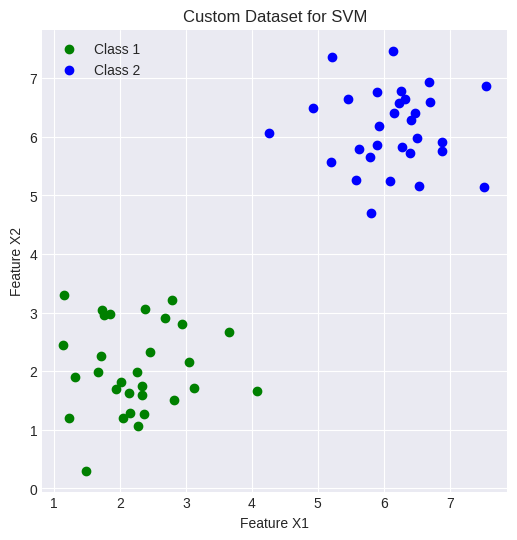

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Cluster around (2, 2)
x1 = np.random.normal(2, 0.8, 30)
y1 = np.random.normal(2, 0.8, 30)
class1 = np.column_stack((x1, y1))

x2 = np.random.normal(6, 0.8, 30)
y2 = np.random.normal(6, 0.8, 30)
class2 = np.column_stack((x2, y2))


plt.figure(figsize=(6,6))
plt.scatter(class1[:, 0], class1[:, 1], color='green', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='blue', label='Class 2')
plt.title("Custom Dataset for SVM")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.legend()
plt.grid(True)
plt.show()


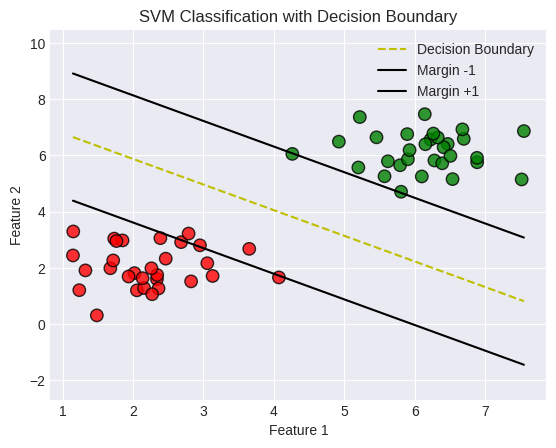

In [42]:
X = np.vstack((class1, class2))
y = np.hstack((-1*np.ones(len(class1)), np.ones(len(class2))))


# Set seed
np.random.seed(42)

# Get total number of samples
n_samples = len(y)

# Define test size (e.g., 20% for testing)
test_size = 0.2
n_test = int(n_samples * test_size)
n_train = n_samples - n_test

# Create shuffled indices
indices = np.random.permutation(n_samples)

# Split indices
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Define color map for two classes
    colors = ['red' if label == -1 else 'green' for label in y]
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors, edgecolors='k', s=80, alpha=0.8)


    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label='Decision Boundary')

    # Margins (black lines)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k', label='Margin -1')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k', label='Margin +1')

    # Adjust limits
    x1_min, x1_max = np.amin(X[:, 1]), np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    # Labels and legend
    ax.set_title("SVM Classification with Decision Boundary")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

    plt.show()

visualize_svm()

## Neural Networks

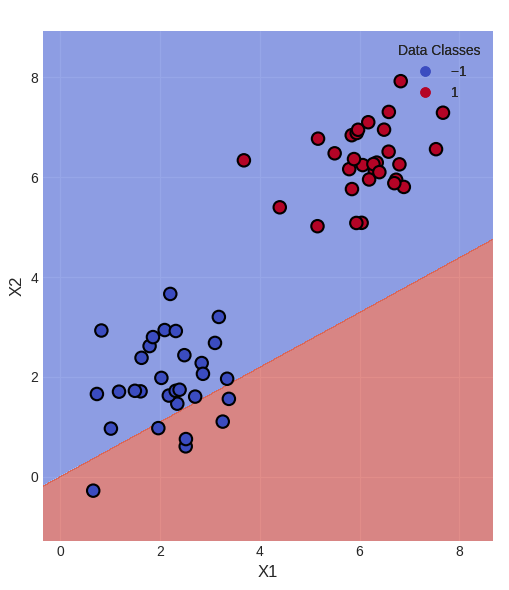

In [36]:
class NN:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Store inputs for backward pass
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases


x1 = np.random.normal(2, 0.8, 30)
y1 = np.random.normal(2, 0.8, 30)
class1 = np.column_stack((x1, y1))

x2 = np.random.normal(6, 0.8, 30)
y2 = np.random.normal(6, 0.8, 30)
class2 = np.column_stack((x2, y2))
# Create dataset
X = np.vstack((class1, class2))
y = np.hstack((-1*np.ones(len(class1)), np.ones(len(class2))))
# Dense layer with 2 input features and 2 output values
dense1 = NN(2, 2)
dense1.forward(X)

# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a grid of points (the mesh) to test the d
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prepare the mesh grid points for the forward pass
Z_input = np.c_[xx.ravel(), yy.ravel()]

# Run the forward pass on the entire mesh grid
dense1.forward(Z_input)

Z_predictions = np.argmax(dense1.output, axis=1)

# Reshape the predictions back into the original grid shape for plotting
Z = Z_predictions.reshape(xx.shape)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn-v0_8-darkgrid')
ax.set_title('Dense Layer Predictions (Untrained Linear Classifier)', fontsize=14, color='white')

# Plot the decision boundary areas
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot the original training data points on top
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
                     edgecolors='black', linewidth=1.5, s=80)

# Add a legend for the data points
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Data Classes", fontsize=10)
ax.add_artist(legend1)

# Style the axes
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

